In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [147]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/DIABETES.csv',engine='python',encoding='euc-kr')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [149]:
df_y = df["Y"]
df_x = df.drop(["Y"], axis=1,inplace = False)


In [150]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)

In [151]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 설명력 확인
print(tree_uncustomized.score(df_train_x, df_train_y))
#test 설명력 확인
print(tree_uncustomized.score(df_test_x, df_test_y))

1.0
-0.14273904167992146


In [152]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [153]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


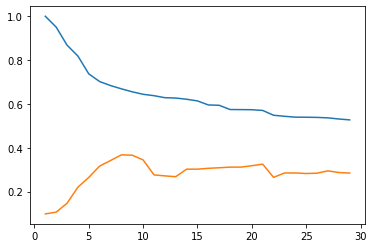

In [134]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '-', label = "test score")

In [155]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,50)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.591,0.231
1,6,0.591,0.231
2,8,0.591,0.231
3,10,0.591,0.231
4,12,0.591,0.231
5,14,0.591,0.231
6,16,0.591,0.231
7,18,0.591,0.231
8,20,0.591,0.231
9,22,0.591,0.231


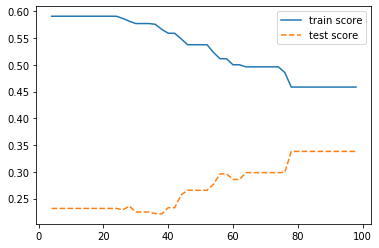

In [156]:
# plt.plot(para_split, train_score, linstyle='-', label = 'Train Score')
# plt.plot(para_split, test_score, linstyle='-', label = 'Test Score')
# plt.legend()

plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, test_score, linestyle = '--', label = "test score")
plt.legend()

In [157]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=28,max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.556,0.264
4,5,0.592,0.215
5,6,0.613,0.173
6,7,0.621,0.163
7,8,0.621,0.163
8,9,0.621,0.163
9,10,0.621,0.163


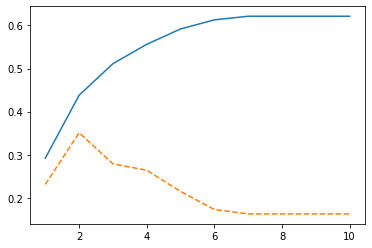

In [158]:
plt.plot(para_depth, train_score, linestyle = '-', label="train Score")
plt.plot(para_depth, test_score, linestyle = '--', label="train Score")

In [159]:
tree_final=DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=28,max_depth=2)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=28, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [160]:
tree_final.score(df_test_x, df_test_y)

0.3510444710469337

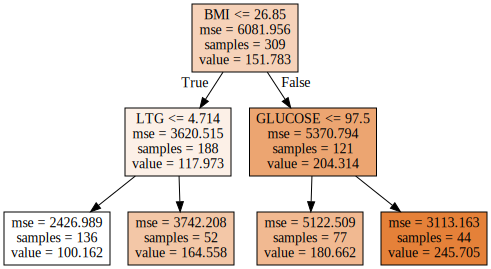

In [163]:
export_graphviz(tree_final, out_file='tree_final.dot', feature_names =df_x.columns ,impurity=True,filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))